## Transfer Learning

Use transfer learning to build and train a neural network for image classification using a pretrained model (VGG16 ) (CIFAR-10 dataset)

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

In [2]:
# 1. Load and preprocess CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [4]:
# 2. Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# 3. Build a new model on top of the VGG16 base
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# 5. Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.4182 - loss: 1.6557 - val_accuracy: 0.5556 - val_loss: 1.2675
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.5462 - loss: 1.2988 - val_accuracy: 0.5802 - val_loss: 1.2045
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5635 - loss: 1.2443 - val_accuracy: 0.5848 - val_loss: 1.1794
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5750 - loss: 1.2091 - val_accuracy: 0.5882 - val_loss: 1.1717
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5844 - loss: 1.1851 - val_accuracy: 0.5945 - val_loss: 1.1572
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5956 - loss: 1.1532 - val_accuracy: 0.6005 - val_loss: 1.1432
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5977 - loss: 1.1401 - val_accuracy: 0.6039 - val_loss: 1.1340
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6072 - loss: 

In [6]:
# 6. Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6075 - loss: 1.1200
Test accuracy: 0.6079999804496765


In [7]:
# Predict the test data
y_pred = model.predict(test_images)
y_pred_classes = y_pred.argmax(axis=1)
y_true = test_labels.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


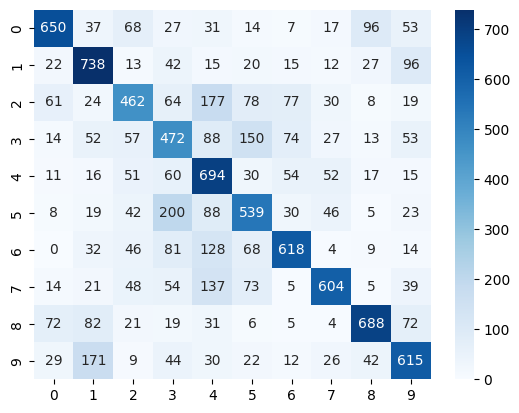

In [8]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

In [9]:
# Classification report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1000
           1       0.62      0.74      0.67      1000
           2       0.57      0.46      0.51      1000
           3       0.44      0.47      0.46      1000
           4       0.49      0.69      0.57      1000
           5       0.54      0.54      0.54      1000
           6       0.69      0.62      0.65      1000
           7       0.73      0.60      0.66      1000
           8       0.76      0.69      0.72      1000
           9       0.62      0.61      0.62      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000



In [10]:
# ROC Curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

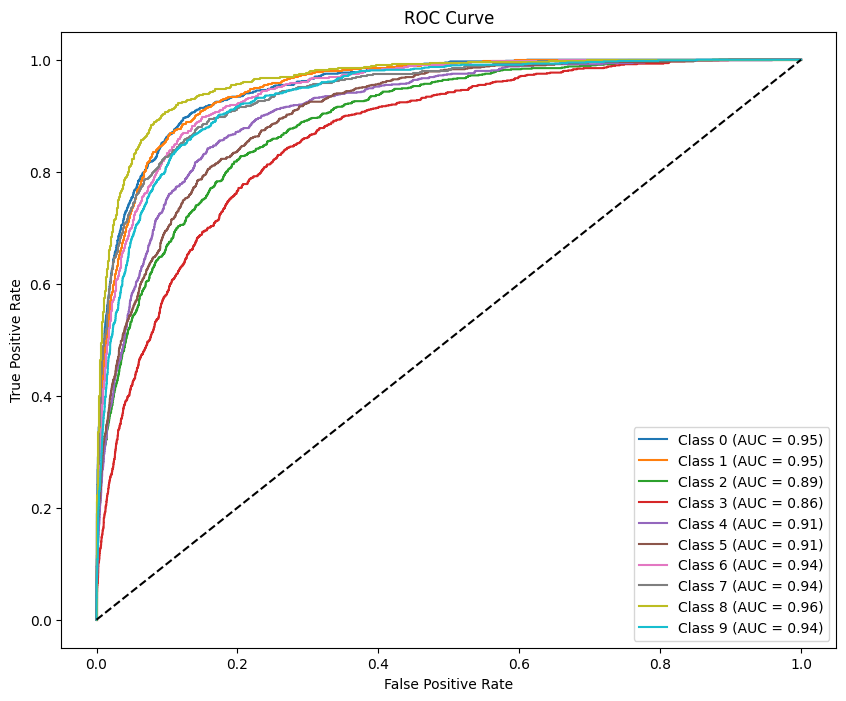

In [11]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()